For the installation do this instead:

python -m pip install -e .

In [1]:
import pickle
import pandas as pd
from clipzyme import CLIPZyme
import numpy as np
import torch

In [3]:
data = np.array(torch.load('/disk1/jyang4/repos/CLIPZyme/results/test/clipzyme_model/new_data/sample_sample_0.reaction.pt'))
np.sum(data == 0.)

989

### Extract protein representations

In [4]:
path = 'results/pretrained/clipzyme_model/protein2EC_cluster50'


df = pd.read_csv('files/protein2EC_cluster50.csv')
length = len(df)
EClist = np.loadtxt("/disk1/jyang4/repos/CARE/processed_data/EC_list.txt", dtype=str)

embeddings = np.zeros((length, 1280))
#concatenate all embeddings
failed = []
for i in range(length):
    try:
        embeddings[i] = torch.load(f'{path}/sample_sample_{i}.protein.pt')
    except:
        print(f'{path}/sample_sample_{i}.protein.pt not found')
        failed.append(i)
        continue

results/pretrained/clipzyme_model/protein2EC_cluster50/sample_sample_155.protein.pt not found
results/pretrained/clipzyme_model/protein2EC_cluster50/sample_sample_200.protein.pt not found
results/pretrained/clipzyme_model/protein2EC_cluster50/sample_sample_209.protein.pt not found
results/pretrained/clipzyme_model/protein2EC_cluster50/sample_sample_290.protein.pt not found
results/pretrained/clipzyme_model/protein2EC_cluster50/sample_sample_293.protein.pt not found
results/pretrained/clipzyme_model/protein2EC_cluster50/sample_sample_298.protein.pt not found
results/pretrained/clipzyme_model/protein2EC_cluster50/sample_sample_299.protein.pt not found
results/pretrained/clipzyme_model/protein2EC_cluster50/sample_sample_303.protein.pt not found
results/pretrained/clipzyme_model/protein2EC_cluster50/sample_sample_304.protein.pt not found
results/pretrained/clipzyme_model/protein2EC_cluster50/sample_sample_305.protein.pt not found
results/pretrained/clipzyme_model/protein2EC_cluster50/sampl

In [5]:
print(len(failed))
df['index'] = df.index
#drop indices in failed
df = df.drop(failed)

522


In [6]:
ec2index = df.groupby('EC number')['index'].apply(list).to_frame().to_dict()['index']

cluster_centers = np.zeros((len(EClist), 1280))
for i, ec in enumerate(EClist):
    #average together the embeddings for each EC number
    try:
        indices = ec2index[ec]
        cluster_centers[i] = np.mean(embeddings[indices], axis=0)
    except:
        cluster_centers[i] = np.zeros(1280)

cluster_centers

array([[ 0.00695404,  0.00906996, -0.0018562 , ...,  0.0009524 ,
        -0.00348147,  0.01772444],
       [ 0.00653346,  0.0184211 , -0.03409347, ...,  0.00590318,
         0.00092498,  0.03337769],
       [ 0.01728218,  0.00888956, -0.01027402, ...,  0.00378615,
        -0.00412735,  0.02607958],
       ...,
       [ 0.0434782 , -0.02031397,  0.00936925, ..., -0.00888089,
        -0.00672255,  0.03892438],
       [ 0.00718313, -0.00829206,  0.02199208, ..., -0.00457703,
        -0.01323812, -0.00293109],
       [ 0.04028151, -0.0029525 ,  0.01158899, ..., -0.00164447,
        -0.00932373,  0.02943208]])

In [7]:
results = {}
results["protein_repr_array"] = cluster_centers
np.save('/disk1/jyang4/repos/CARE/task2_baselines/CLIPZyme/output/easy_split/representations/all_ECs_cluster_centers.npy', results)

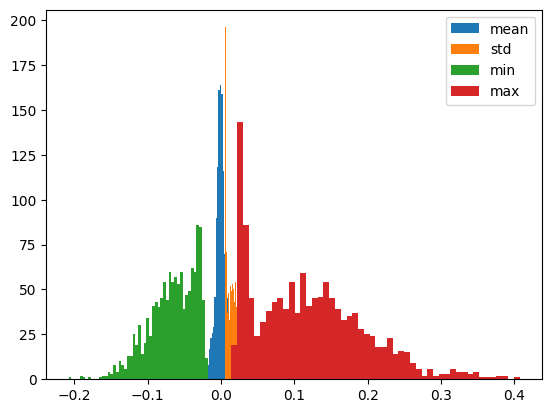

In [9]:
#get the mean, std, min, max for each column and plot as histogram
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
mean = np.mean(cluster_centers, axis=0)
std = np.std(cluster_centers, axis=0)
min = np.min(cluster_centers, axis=0)
max = np.max(cluster_centers, axis=0)

plt.hist(mean, bins=50, label='mean')
plt.hist(std, bins=50, label='std')
plt.hist(min, bins=50, label='min')
plt.hist(max, bins=50, label='max')
plt.legend()

### Extract reaction representations

In [3]:
test_set = 'hard_reaction_test'
path = 'results/pretrained/clipzyme_model/' + test_set
df = pd.read_csv('files/{}.csv'.format(test_set))
length = len(df)

embeddings = np.zeros((length, 1280))
#concatenate all embeddings
failed = []
for i in range(length):
    try:
        embeddings[i] = torch.load(f'{path}/sample_sample_{i}.reaction.pt')
    except:
        print(f'{path}/sample_sample_{i}.reaction.pt not found')
        failed.append(i)
        continue

embeddings

results/pretrained/clipzyme_model/hard_reaction_test/sample_sample_16.reaction.pt not found
results/pretrained/clipzyme_model/hard_reaction_test/sample_sample_63.reaction.pt not found
results/pretrained/clipzyme_model/hard_reaction_test/sample_sample_128.reaction.pt not found
results/pretrained/clipzyme_model/hard_reaction_test/sample_sample_129.reaction.pt not found
results/pretrained/clipzyme_model/hard_reaction_test/sample_sample_130.reaction.pt not found
results/pretrained/clipzyme_model/hard_reaction_test/sample_sample_131.reaction.pt not found
results/pretrained/clipzyme_model/hard_reaction_test/sample_sample_132.reaction.pt not found
results/pretrained/clipzyme_model/hard_reaction_test/sample_sample_133.reaction.pt not found
results/pretrained/clipzyme_model/hard_reaction_test/sample_sample_134.reaction.pt not found
results/pretrained/clipzyme_model/hard_reaction_test/sample_sample_135.reaction.pt not found
results/pretrained/clipzyme_model/hard_reaction_test/sample_sample_136.r

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01971458, 0.        , 0.        , ..., 0.04135529, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.09832948, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.09652392]])

In [4]:
results = {}
results["reaction_repr_array"] = embeddings
np.save('/disk1/jyang4/repos/CARE/task2_baselines/CLIPZyme/output/hard_split/representations/{}_representations.npy'.format(test_set), results)

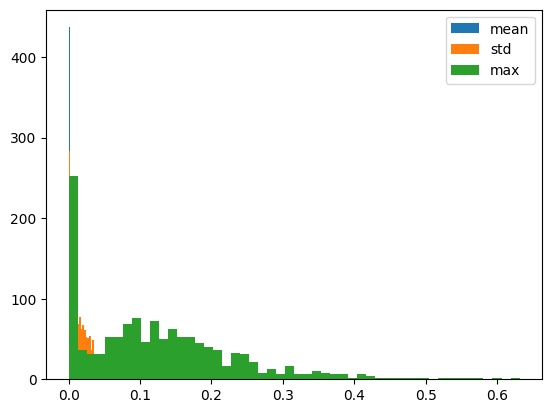

In [14]:
#get the mean, std, min, max for each column and plot as histogram
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
mean = np.mean(embeddings, axis=0)
std = np.std(embeddings, axis=0)
min = np.min(embeddings, axis=0)
max = np.max(embeddings, axis=0)

plt.hist(mean, bins=50, label='mean')
plt.hist(std, bins=50, label='std')
#plt.hist(min, bins=50, label='min')
plt.hist(max, bins=50, label='max')
plt.legend()

### Make the test sets for inference (batched script works better than this in line implementation)

In [2]:
## Load the screening set (this is precomputed from the paper)
##-----------------------
screenset = pickle.load(open("files/clipzyme_screening_set.p", 'rb'))
screen_hiddens = screenset["hiddens"] # hidden representations (261907, 1280)
screen_unis = screenset["uniprots"] # uniprot ids (261907,)

### First need to check if it would make sense to retrain the model

In [31]:
#check how many EC numbers are covered by our train set
train_df = pd.read_csv("/disk1/jyang4/repos/CARE/processed_data/protein2EC.csv")
train_df

,Entry,Entry Name,Sequence,EC number,Length,clusterRes50,clusterRes30
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269,A0A009IHW8,A1AY86
1,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248,A0A024SC78,A0A024SC78
2,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471,G4MM92,G4MM92
3,A0A059TC02,CCR1_PETHY,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...,1.2.1.44,333,Q9S9N9,P14721
4,A0A068J840,UGT1_PANGI,MKSELIFLPAPAIGHLVGMVEMAKLFISRHENLSVTVLIAKFYMDT...,2.4.1.363,475,Q2V6K0,Q40287
...,...,...,...,...,...,...,...
149783,P36352,POLR_PHMV,VIVGTPPISPNWPAIKDLLHLKFKTEITSSPLFCGYYLSPAGCIRN...,2.7.7.48,178,P36352,P36352
149784,P39262,VG56_BPT4,MAHFNECAHLIEGVDKAQNEYWDILGDEKDPLQVMLDMQRFLQIRL...,3.6.1.12,171,Q94MV8,Q94MV8
149785,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240,Q05115,Q05115
149786,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172,Q94MV8,Q94MV8


In [32]:
ECs = train_df["EC number"].unique()
len(ECs)

4146

In [33]:
swissprot = pd.read_csv('/disk1/jyang4/repos/CARE/generate_datasets_splits/raw_data/uniprotkb_AND_reviewed_true_AND_protein_2024_05_01.tsv', sep='\t')
swissprot = swissprot[swissprot['EC number'].notna()]
# Now expand out the ones we have left
swissprot['EC number'] = [ec.split(';') for ec in swissprot['EC number']]
swissprot = swissprot.explode('EC number')
# Clean the EC numbers
swissprot['EC number'] = [ec.replace(' ', '') for ec in swissprot['EC number']]
swissprot

,Entry,Entry Name,Sequence,EC number,Length
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.-,269
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269
1,A0A023I7E1,ENG1_RHIMI,MRFQVIVAAATITMITSYIPGVASQSTSDGDDLFVPVSNFDPKSIF...,3.2.1.39,796
2,A0A024B7W1,POLG_ZIKVF,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...,2.1.1.56,3423
2,A0A024B7W1,POLG_ZIKVF,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...,2.1.1.57,3423
...,...,...,...,...,...
254924,Q6HX62,Y3032_BACAN,MGQNQFRWSNEQLREHVEIIDGTRSPHKLLKNATYLNSYIREWMQA...,3.5.4.2,584
254925,Q6L032,Y1085_PICTO,MLLKNIKISNDYNIFMIIASRKPSLKDIYKIIKVSKFDEPADLIIE...,3.5.4.2,573
254926,Q7TDB6,RDRP_MYRV9,MSLTSRYTHFVPDSTITEILNDSNTPQILLHYANIVNGSTPVHFTS...,2.7.7.48,1354
254927,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172


In [34]:
subset = swissprot[swissprot['Entry'].isin(screen_unis)]
subset

,Entry,Entry Name,Sequence,EC number,Length
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.-,269
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269
3,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248
4,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471
6,A0A059TC02,CCR1_PETHY,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...,1.2.1.44,333
...,...,...,...,...,...
254909,P00881,DC4C_PSEPU,MDEKQRYDAGMQVRRAVLGDAHVDRCLEKLNDFNGEFQEMITRHACGD,4.1.1.44,48
254910,P13722,CBAL_GEOSE,KAWFVLSMRAVGGLFVDLWTSVAKTVKGWL,3.4.17.6,30
254923,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240
254924,Q6HX62,Y3032_BACAN,MGQNQFRWSNEQLREHVEIIDGTRSPHKLLKNATYLNSYIREWMQA...,3.5.4.2,584


In [35]:
subset_ECs = subset["EC number"].unique()
len(subset_ECs)

5190

Looks like some stuff is missing, so we will need to make our own screening dataset

### still need to check if any of test set ECs are not in here

In [36]:
#check if everything in ECs is in subset_ECs
for ec in ECs:
    if ec not in subset_ECs:
        print(ec)

3.4.21.26
1.11.1.2
3.4.22.39
3.2.2.17
2.4.1.358
2.3.1.145
4.6.1.6
3.4.23.44
1.21.99.4
1.21.99.3
2.7.4.13
3.4.24.43
1.14.13.187
2.1.1.248
2.1.1.250
2.1.1.249
3.1.3.34
7.2.2.18
3.4.22.50
1.7.1.9
3.4.21.97
1.12.98.3
2.2.1.14
1.1.1.198
2.7.7.107
2.4.1.26
2.4.1.27
3.4.22.28
1.14.11.71
1.13.11.89
7.4.2.13
2.4.1.349
1.14.19.40
2.4.1.341
1.14.19.57
2.1.2.8
1.3.7.6


### Instead we need to extract our own protein and reaction representations

In [40]:
#make a file to test this out
new_data = pd.read_csv('files/new_data.csv')
new_data

,reaction,sequence,protein_id,cif
0,[CH3:1][N+:2]([CH3:3])([CH3:4])[CH2:5][CH:6]=[...,MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPH...,P69905,files/AF-P69905-F1-model_v4.cif


In [38]:
from clipzyme import CLIPZyme
from clipzyme import ReactionDataset

## Create reaction dataset
#-------------------------
reaction_dataset = ReactionDataset(
  dataset_file_path = "files/swissprot.csv",
  esm_dir = "files/esm2_dir",
  protein_cache_dir = "files/AF_graphs", # optional, where to cache processed protein graphs
)
#I think you need a dataloader somewhere here?

Loading ESM model

Preparing dataset

Building dataset: 100%|████████████████████████████████████████| 6006/6006 [00:07<00:00, 845.10it/s]


DATASET CREATED:
        * Number of samples: 6006
        * Number of reactions: 6006
        * Number of proteins: 5071

In [39]:
from torch.utils.data import DataLoader
reaction_dataloader = DataLoader(reaction_dataset, batch_size=128)
reaction_dataloader

In [43]:
model = CLIPZyme(checkpoint_path="checkpoints/328da49af1732dde1d5261b77dd3e611/last.ckpt").to("cuda")

 Loaded model from checkpoints/328da49af1732dde1d5261b77dd3e611/last.ckpt

In [44]:
for batch in reaction_dataloader:
  protein_hiddens = model.extract_protein_features(batch) 

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'torch_geometric.data.data.Data'>

In [14]:
protein_hiddens

NameError: name 'protein_hiddens' is not defined

In [2]:
enzymemap = pickle.load(open("files/cached_enzymemap.p", 'rb'))
#convert to a pandas dataframe
enzymemap_df = pd.DataFrame(enzymemap)
enzymemap_df

,reaction_string,df_row,quality,reactants,products,ec,rowid,sample_id,uniprot_id,protein_id,bond_changes,split,protein_refs,protein_db,rule_id,ec1,ec2,ec3,ec4
0,CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...,2,0.991708,"[[CH3:1][CH:2]=[O:3], [NH2:4][C:5](=[O:6])[C:7...","[[CH3:1][CH2:2][OH:3], [NH2:4][C:5](=[O:6])[c:...",1.1.1.1,1,H9ZGN0_1_2,H9ZGN0,H9ZGN0,"[[45, 46, 1.5], [46, 47, 1.5], [7, 8, 1.5], [4...",None,[H9ZGN0],uniprot,0,1,1.1,1.1.1,1.1.1.1
1,CCO.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP...,3,0.991708,"[[CH3:1][CH2:2][OH:3], [NH2:4][C:5](=[O:6])[c:...","[[CH3:1][CH:2]=[O:3], [NH2:4][C:5](=[O:6])[C:7...",1.1.1.1,1,H9ZGN0_1_3,H9ZGN0,H9ZGN0,"[[7, 8, 1.0], [11, 47, 1.0], [10, 9, 2.0], [47...",None,[H9ZGN0],uniprot,0,1,1.1,1.1.1,1.1.1.1
2,CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...,8,0.991708,"[[CH3:1][CH:2]=[O:3], [NH2:4][C:5](=[O:6])[C:7...","[[CH3:1][CH2:2][OH:3], [NH2:4][C:5](=[O:6])[c:...",1.1.1.1,4,P28625_4_8,P28625,P28625,"[[45, 46, 1.5], [46, 47, 1.5], [7, 8, 1.5], [4...",None,[P28625],uniprot,0,1,1.1,1.1.1,1.1.1.1
3,CCO.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP...,9,0.991708,"[[CH3:1][CH2:2][OH:3], [NH2:4][C:5](=[O:6])[c:...","[[CH3:1][CH:2]=[O:3], [NH2:4][C:5](=[O:6])[C:7...",1.1.1.1,4,P28625_4_9,P28625,P28625,"[[7, 8, 1.0], [11, 47, 1.0], [10, 9, 2.0], [47...",None,[P28625],uniprot,0,1,1.1,1.1.1,1.1.1.1
4,CC(=O)C=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)...,25,0.991708,"[[CH3:1][C:2](=[O:3])[CH:4]=[O:5], [NH2:6][C:7...","[[CH3:1][C:2](=[O:3])[CH2:4][OH:5], [NH2:6][C:...",1.1.1.1,15,A0A1D8PP43_15_25,A0A1D8PP43,A0A1D8PP43,"[[49, 9, 1.5], [11, 47, 1.5], [47, 48, 1.5], [...",None,[A0A1D8PP43],uniprot,0,1,1.1,1.1.1,1.1.1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46351,N=c1[nH]c(=O)c2ncn([C@@H]3O[C@H](COP(=O)(O)OP(...,349404,0.454545,[[NH2:29][c:30]1[n:31][cH:32][n:33][c:34]2[c:3...,[[NH:1]=[c:2]1[nH:3][c:4](=[O:5])[c:6]2[n:7][c...,6.5.1.1,324271,P56709_324271_349404,P56709,P56709,"[[13, 14, 0.0], [13, 54, 1.0]]",None,[P56709],swissprot,279,6,6.5,6.5.1,6.5.1.1
46352,N=c1[nH]c(=O)c2ncn([C@@H]3O[C@H](COP(=O)(O)OP(...,349405,0.545455,[[NH2:33][c:34]1[n:35][cH:36][n:37][c:38]2[c:3...,[[NH:1]=[c:2]1[nH:3][c:4](=[O:5])[c:6]2[n:7][c...,6.5.1.1,324272,P56709_324272_349405,P56709,P56709,"[[15, 18, 0.0], [15, 58, 1.0]]",None,[P56709],swissprot,281,6,6.5,6.5.1,6.5.1.1
46353,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,349406,0.545455,[[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8...,[[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8...,6.5.1.1,324273,P56709_324273_349406,P56709,P56709,"[[42, 45, 0.0], [26, 42, 1.0]]",None,[P56709],swissprot,281,6,6.5,6.5.1,6.5.1.1
46354,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,349407,0.545455,[[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8...,[[NH2:1][c:2]1[n:3][cH:4][n:5][c:6]2[c:7]1[n:8...,6.5.1.1,324274,P56709_324274_349407,P56709,P56709,"[[16, 52, 1.0], [16, 19, 0.0]]",None,[P56709],swissprot,281,6,6.5,6.5.1,6.5.1.1


In [ ]:
unique_reactions = enzymemap_df.drop_duplicates(subset=["reaction"])

In [44]:
#load a json as a dictionary
import json
with open('files/enzymemap.json') as f:
    enzymemap_dict = json.load(f)
enzymemap_dict

[{'mapped_reactants': ['[CH3:1][CH:2]=[O:3]',
   '[H+]',
   '[NH2:4][C:5](=[O:6])[C:7]1=[CH:8][N:9]([C@@H:10]2[O:11][C@H:12]([CH2:13][O:14][P:15](=[O:16])([OH:17])[O:18][P:19](=[O:20])([OH:21])[O:22][CH2:23][C@H:24]3[O:25][C@@H:26]([n:27]4[cH:28][n:29][c:30]5[c:31]([NH2:32])[n:33][cH:34][n:35][c:36]45)[C@H:37]([OH:38])[C@@H:39]3[OH:40])[C@@H:41]([OH:42])[C@H:43]2[OH:44])[CH:45]=[CH:46][CH2:47]1'],
  'mapped_products': ['[CH3:1][CH2:2][OH:3]',
   '[NH2:4][C:5](=[O:6])[c:7]1[cH:8][n+:9]([C@@H:10]2[O:11][C@H:12]([CH2:13][O:14][P:15](=[O:16])([OH:17])[O:18][P:19](=[O:20])([OH:21])[O:22][CH2:23][C@H:24]3[O:25][C@@H:26]([n:27]4[cH:28][n:29][c:30]5[c:31]([NH2:32])[n:33][cH:34][n:35][c:36]45)[C@H:37]([OH:38])[C@@H:39]3[OH:40])[C@@H:41]([OH:42])[C@H:43]2[OH:44])[cH:45][cH:46][cH:47]1'],
  'reactants': ['CC=O',
   'NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n4cnc5c(N)ncnc54)[C@H](O)[C@@H]3O)[C@@H](O)[C@H]2O)C=CC1',
   '[H+]'],
  'products': ['CCO',
   'NC(=O)c1ccc[n+]([C@@H]2O[

In [47]:
enzymemap_dict[0]['mapped_products']

['[CH3:1][CH2:2][OH:3]',
 '[NH2:4][C:5](=[O:6])[c:7]1[cH:8][n+:9]([C@@H:10]2[O:11][C@H:12]([CH2:13][O:14][P:15](=[O:16])([OH:17])[O:18][P:19](=[O:20])([OH:21])[O:22][CH2:23][C@H:24]3[O:25][C@@H:26]([n:27]4[cH:28][n:29][c:30]5[c:31]([NH2:32])[n:33][cH:34][n:35][c:36]45)[C@H:37]([OH:38])[C@@H:39]3[OH:40])[C@@H:41]([OH:42])[C@H:43]2[OH:44])[cH:45][cH:46][cH:47]1']